In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import functions as fs
import numpy as np
import missingno as msn

In [2]:
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_theme(context = 'poster' , style = 'ticks' , palette = 'magma' , font_scale = 0.6 , rc = {'figure.figsize':[18 , 8]})

## Scan Dataset

In [3]:
df = pd.read_csv('dataforpre.csv')

In [4]:
df.head(4)

,price (million),geo_lat,geo_lon,building_type,level,levels,rooms,area,kitchen_area,object_type,Datetime,City,season,year,month,price_status
0,4.999999,59.958459,30.215529,Brick,8.0,13.0,1.0,36.0,7.2,Secondary Real Estate,2018-10-20 22:11:49,St. Petersburg,autumn,2018.0,10.0,Low
1,2.150000,45.072674,41.936996,Brick,5.0,5.0,1.0,52.0,15.0,Secondary Real Estate,2019-08-23 16:39:54,Stavropol,summer,2019.0,8.0,Low
2,8.600000,59.939359,30.437068,Monolithic,11.0,22.0,1.0,37.1,9.8,Secondary Real Estate,2021-01-21 18:39:45,St. Petersburg,winter,2021.0,1.0,Medium
3,5.100000,59.740478,30.569539,Panel,2.0,9.0,3.0,74.5,9.5,Secondary Real Estate,2020-07-18 17:51:46,Kolpino,summer,2020.0,7.0,Medium


## Drop Unnecessary Features
* Datetime,month, season, geo_lat, geo_lon, price_status

In [5]:
df.drop(columns=['Datetime','month','season','geo_lat','geo_lon','price_status'],inplace=True)

## spliting the data

In [6]:
x_train, x_test, y_train, y_test = fs.train_test(df, 'price (million)')

In [7]:
# reseting the indexes
x_train.reset_index(drop=True, inplace=True)
x_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [8]:
x_train.head(3)

,building_type,level,levels,rooms,area,kitchen_area,object_type,City,year
0,Brick,7.0,9.0,2.0,64.0,9.0,NaN,St. Petersburg,2019.0
1,Monolithic,3.0,19.0,1.0,39.6,12.6,Secondary Real Estate,Novorossiysk,2020.0
2,Brick,8.0,9.0,2.0,61.0,16.6,New Building,city district of Novosibirsk,2019.0


In [9]:
x_test.head(2)

,building_type,level,levels,rooms,area,kitchen_area,object_type,City,year
0,Monolithic,7.0,28.0,2.0,57.30,12.70,New Building,St. Petersburg,2020.0
1,Panel,2.0,17.0,1.0,48.39,11.95,Secondary Real Estate,city district of Samara,2020.0


In [10]:
x_train.shape

(38975, 9)

In [11]:
y_train.head(2)

0    6.80
1    2.95
Name: price (million), dtype: float64

In [12]:
y_test.head(2)

0    9.150810
1    2.379495
Name: price (million), dtype: float64

## dealing with missing values

<AxesSubplot:>

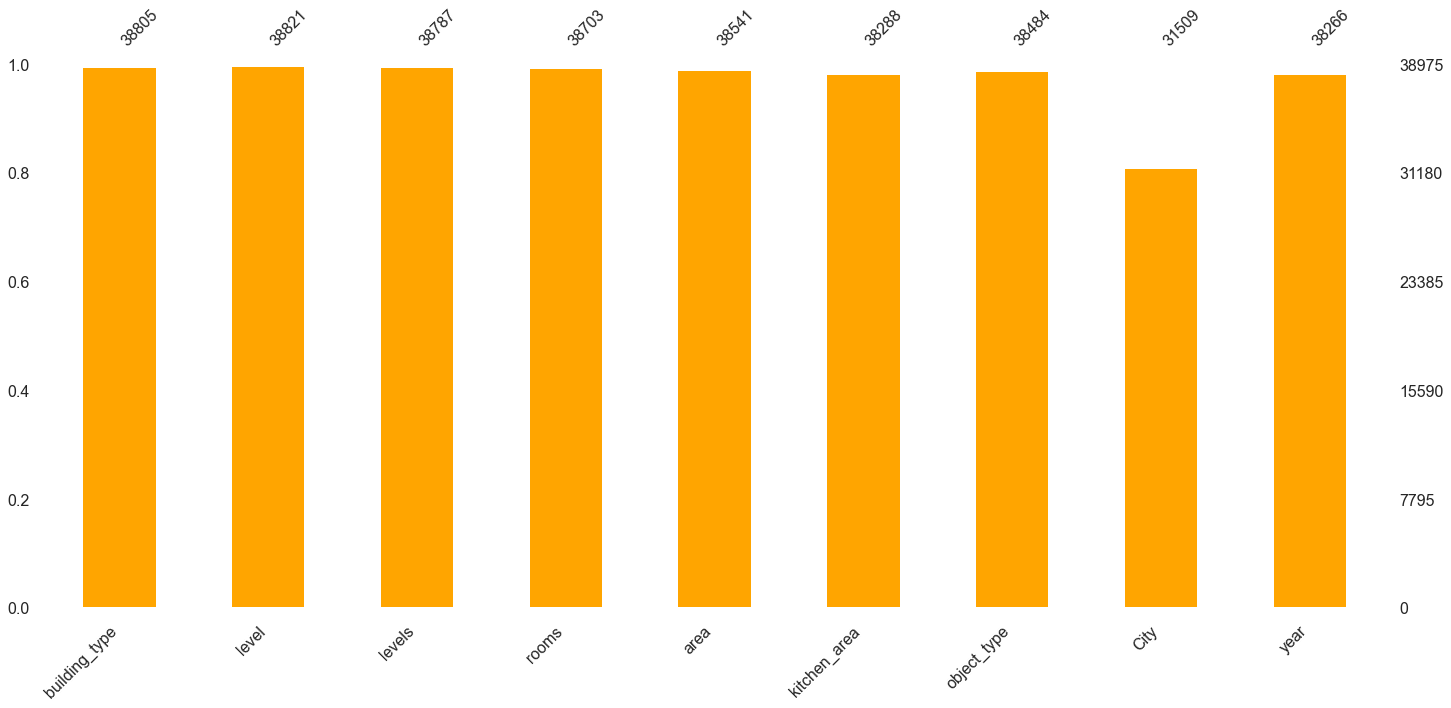

In [13]:
# Returns no of non null values
msn.bar(x_train,color='orange')

In [14]:
round(x_train.isnull().mean() * 100,3).to_frame('no of missing').T

,building_type,level,levels,rooms,area,kitchen_area,object_type,City,year
no of missing,0.436,0.395,0.482,0.698,1.114,1.763,1.26,19.156,1.819


#### so:
* 'building_type',' level', 'levels', 'rooms', 'area', 'kitchen_area', 'object_type', 'year' ---> have percentage less than 2% (drop Nans)|
* 'City' Has 19.156% so am gonna impute it 

In [15]:
#first we have to join y_train with x_train just to drop the same rows
x_train['price'] = y_train

In [16]:
x_train.dropna(subset=['building_type','level','levels','rooms','area','kitchen_area','object_type','year']
               ,axis =0,inplace=True)

In [17]:
x_train.shape

(35957, 10)

##### impute City Column

In [18]:
fs.simpImputer(x_train, 'City', 2)

In [19]:
# no Nans
round(x_train.isnull().mean() * 100,3).to_frame('no of missing').T

,building_type,level,levels,rooms,area,kitchen_area,object_type,City,year,price
no of missing,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
# reindex
x_train.reset_index(drop=True,inplace=True)

In [21]:
x_test.head(3)

,building_type,level,levels,rooms,area,kitchen_area,object_type,City,year
0,Monolithic,7.0,28.0,2.0,57.30,12.70,New Building,St. Petersburg,2020.0
1,Panel,2.0,17.0,1.0,48.39,11.95,Secondary Real Estate,city district of Samara,2020.0
2,Brick,1.0,16.0,3.0,72.20,11.00,New Building,city district of Novosibirsk,2019.0


### same steps for x_test

<AxesSubplot:>

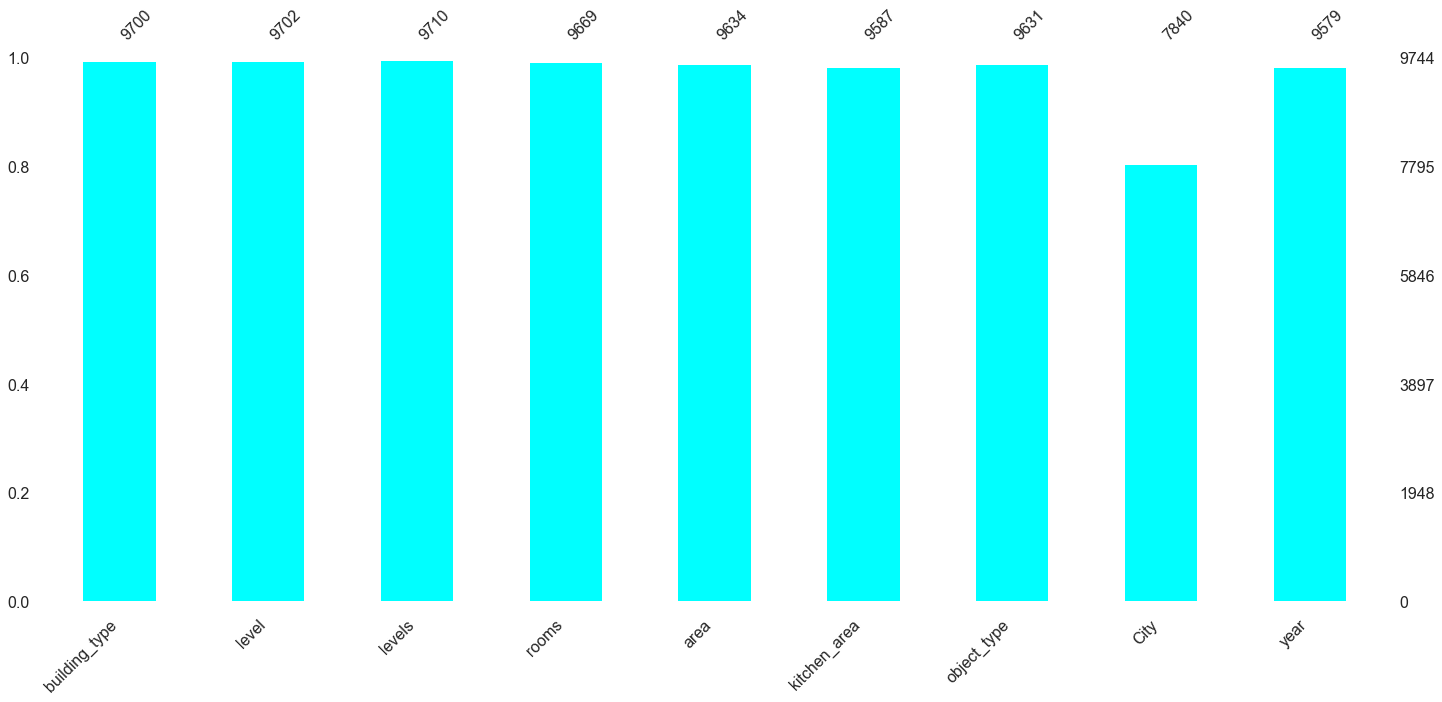

In [22]:
# Returns no of non null values
msn.bar(x_test,color='cyan')

In [23]:
round(x_test.isnull().mean() * 100,3).to_frame('no of missing').T

,building_type,level,levels,rooms,area,kitchen_area,object_type,City,year
no of missing,0.452,0.431,0.349,0.77,1.129,1.611,1.16,19.54,1.693


#### so:
* 'building_type',' level', 'levels', 'rooms', 'area', 'kitchen_area', 'object_type', 'year' ---> have percentage less than 2% (drop Nans)
* 'City' Has 19.54% so am gonna impute it 

In [24]:
#first we have to join y_test with x_test just to drop the same rows
x_test['price'] = y_test

In [25]:
x_test.dropna(subset=['building_type','level','levels','rooms','area','kitchen_area','object_type','year'],
               axis =0,inplace=True)

In [26]:
x_test.shape

(9032, 10)

##### impute City Column

In [27]:
fs.simpImputer(x_test, 'City', 2)

In [28]:
# no Nans
round(x_test.isnull().mean() * 100,3).to_frame('no of missing').T

,building_type,level,levels,rooms,area,kitchen_area,object_type,City,year,price
no of missing,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
x_test.shape

(9032, 10)

In [30]:
# reindex x_test
x_test.reset_index(drop=True,inplace=True)

In [31]:
x_test.head(3)

,building_type,level,levels,rooms,area,kitchen_area,object_type,City,year,price
0,Monolithic,7.0,28.0,2.0,57.30,12.70,New Building,St. Petersburg,2020.0,9.150810
1,Panel,2.0,17.0,1.0,48.39,11.95,Secondary Real Estate,city district of Samara,2020.0,2.379495
2,Brick,1.0,16.0,3.0,72.20,11.00,New Building,city district of Novosibirsk,2019.0,3.202000


### Categorical Encoding

In [32]:
# split data into categorical and numerical
x_train_cate = x_train.select_dtypes(exclude='number')
x_train_num = x_train.select_dtypes(include='number')

In [33]:
x_train_cate.head(4)

,building_type,object_type,City
0,Monolithic,Secondary Real Estate,Novorossiysk
1,Brick,New Building,city district of Novosibirsk
2,Monolithic,Secondary Real Estate,Nizhny Novgorod
3,Brick,Secondary Real Estate,St. Petersburg


* building_type --> label_encoding
* object_type --> OnehotEncoder
* City --> binray_encoder

In [34]:
## build_le stands for building_type label encoder in case we want to inverse transform we can use it
x_train_cate['building_type'], build_le = fs.labelE(x_train_cate, 'building_type')

In [36]:
## object_le stands for object_type encoder in case we want to inverse transform we can use it
x_train_cate, object_E = fs.OneHotE(x_train_cate, 'object_type')

In [36]:
x_train_cate.head(3)

,building_type,City,object_type_Secondary Real Estate
0,2,Novorossiysk,1.0
1,1,city district of Novosibirsk,0.0
2,2,Nizhny Novgorod,1.0


In [37]:
s = x_train_cate.City.unique().tolist()
len(s)

208

* best Choice here is binaryEncoder or labeling but here am not gonna apply label just acoiding the wide range (208 value)

In [38]:
x_train_cate, city_E = fs.BinaryE(x_train_cate, 'City')

In [39]:
x_train_cate.head(3)

,building_type,object_type_Secondary Real Estate,City_1,City_2,City_3,City_4,City_5,City_6,City_7,City_8
0,2,1.0,0,0,0,0,0,0,0,1
1,1,0.0,0,0,0,0,0,0,1,0
2,2,1.0,0,0,0,0,0,0,1,1


In [40]:
# check the binary inverse


### x_train_numerical data handling

In [41]:
x_train_num.head(2)

,level,levels,rooms,area,kitchen_area,year,price
0,3.0,19.0,1.0,39.6,12.6,2020.0,2.95
1,8.0,9.0,2.0,61.0,16.6,2019.0,5.50


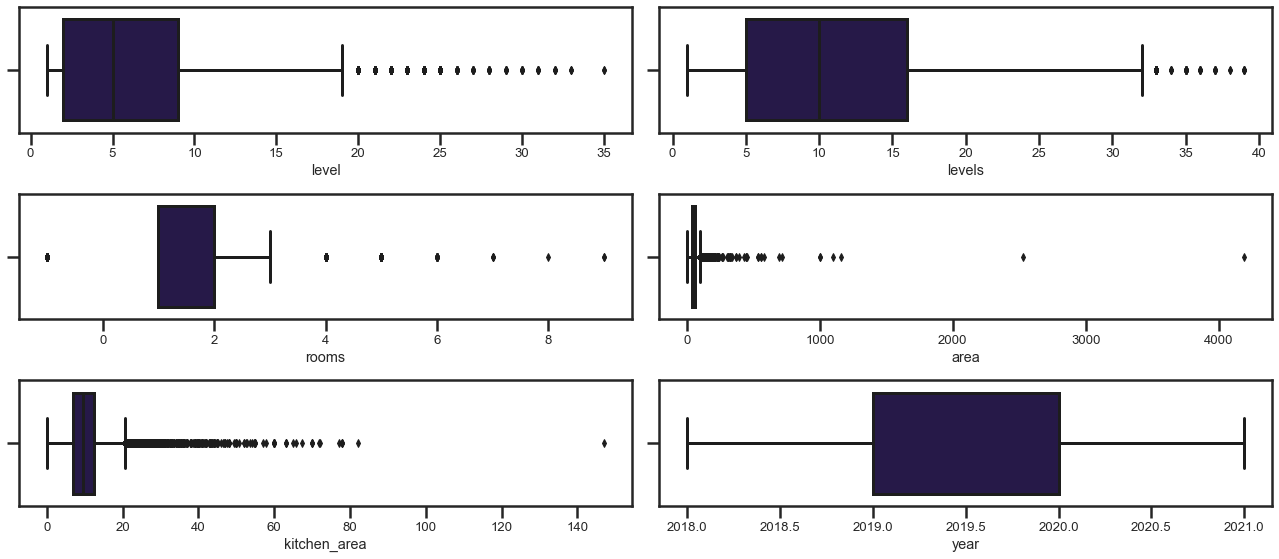

In [42]:
fig,axes = plt.subplots(3,2)
sns.boxplot(data=x_train_num, x="level",ax=axes[0,0])
sns.boxplot(data=x_train_num, x="levels",ax=axes[0,1])
sns.boxplot(data=x_train_num, x="rooms",ax=axes[1,0])
sns.boxplot(data=x_train_num, x="area",ax=axes[1,1])
sns.boxplot(data=x_train_num, x="kitchen_area",ax=axes[2,0])
sns.boxplot(data=x_train_num, x="year",ax=axes[2,1])
fig.tight_layout()

In [43]:
for col in x_train_num.columns:
    print(col, x_train_num[col].max(),',',  x_train_num[col].min())

level 35.0 , 1.0
levels 39.0 , 1.0
rooms 9.0 , -1.0
area 4190.0 , 3.1
kitchen_area 147.0 , 0.06
year 2021.0 , 2018.0
price 19.15391 , 0.5


* level, levels, year, price had no outliers according to russian real estate statistics
* only area and rooms and kitchen_area has wrong values

###### Area, rooms, kitchen_area

In [44]:
## dealing with area less than 69
under_69m = x_train_num[(x_train_num['area'] <= 69) & (x_train_num['rooms'] > 2)].index
for index in under_69m:
    fs.substitute(x_train_num, 'rooms', index, np.random.randint(1,3))
    fs.substitute(x_train_num, 'area', index, np.random.randint(45,70))
    fs.substitute(x_train_num, 'kitchen_area', index, np.random.randint(7,13))

In [45]:
## dealing with area from 70 to 90
above_70m = x_train_num[((x_train_num['area'] >= 70)&(x_train_num['area'] <= 90)) & (x_train_num['rooms'] > 3)].index
for index in above_70m:
    fs.substitute(x_train_num, 'rooms', index, np.random.randint(2,4))
    fs.substitute(x_train_num, 'kitchen_area', index, np.random.randint(8,17))

In [46]:
## dealing with area from 100 to 150
above_100m = x_train_num[((x_train_num['area'] >= 100)&(x_train_num['area'] <= 150)) & (x_train_num['rooms'] > 5)].index
for index in above_100m:
    fs.substitute(x_train_num, 'rooms', index, np.random.randint(3,5))
    fs.substitute(x_train_num, 'kitchen_area', index, np.random.randint(13,22))

In [47]:
## dealing with area from 151 to 300
above_150 = x_train_num[((x_train_num['area'] > 150)&(x_train_num['area'] <= 300)) & (x_train_num['rooms'] > 7)].index
for index in above_150:
    fs.substitute(x_train_num, 'rooms', index, np.random.randint(4,7))
    fs.substitute(x_train_num, 'kitchen_area', index, np.random.randint(15,25))

In [48]:
# apartments greater than 300 square meters
extra = x_train_num[(x_train_num['area'] > 300)].index
for index in extra:
    fs.substitute(x_train_num, 'rooms', index, np.random.randint(7,10))
    fs.substitute(x_train_num, 'area', index, np.random.randint(301,501))
    fs.substitute(x_train_num, 'kitchen_area', index, np.random.randint(25,35))

In [49]:
for col in x_train_num.columns:
    print(col, x_train_num[col].max(),',',  x_train_num[col].min())

level 35.0 , 1.0
levels 39.0 , 1.0
rooms 9.0 , -1.0
area 484.0 , 3.1
kitchen_area 78.0 , 0.06
year 2021.0 , 2018.0
price 19.15391 , 0.5


In [50]:
#area less than 45 meter
area_less45 = x_train_num[x_train_num['area'] <45].index
for index in area_less45:
    fs.substitute(x_train_num, 'area', index, np.random.randint(45,70))
    fs.substitute(x_train_num, 'kitchen_area', index, np.random.randint(7,13))

In [51]:
#kitchen area greater than 35 or less than 7 meters
kitchen_greater35 = x_train_num[(x_train_num['kitchen_area'] >35) | (x_train_num['kitchen_area'] < 7)].index
for index in kitchen_greater35:
    fs.substitute(x_train_num, 'kitchen_area', index, np.random.randint(10,35))

In [52]:
for col in x_train_num.columns:
    print(col, x_train_num[col].max(),',',  x_train_num[col].min())

level 35.0 , 1.0
levels 39.0 , 1.0
rooms 9.0 , -1.0
area 484.0 , 45.0
kitchen_area 35.0 , 7.0
year 2021.0 , 2018.0
price 19.15391 , 0.5


#### conclusion
* now we handeled the area and rooms and kitchen_area colums and there is no outliers according to each of them
* rooms with -1 value it means that this apartment is studio

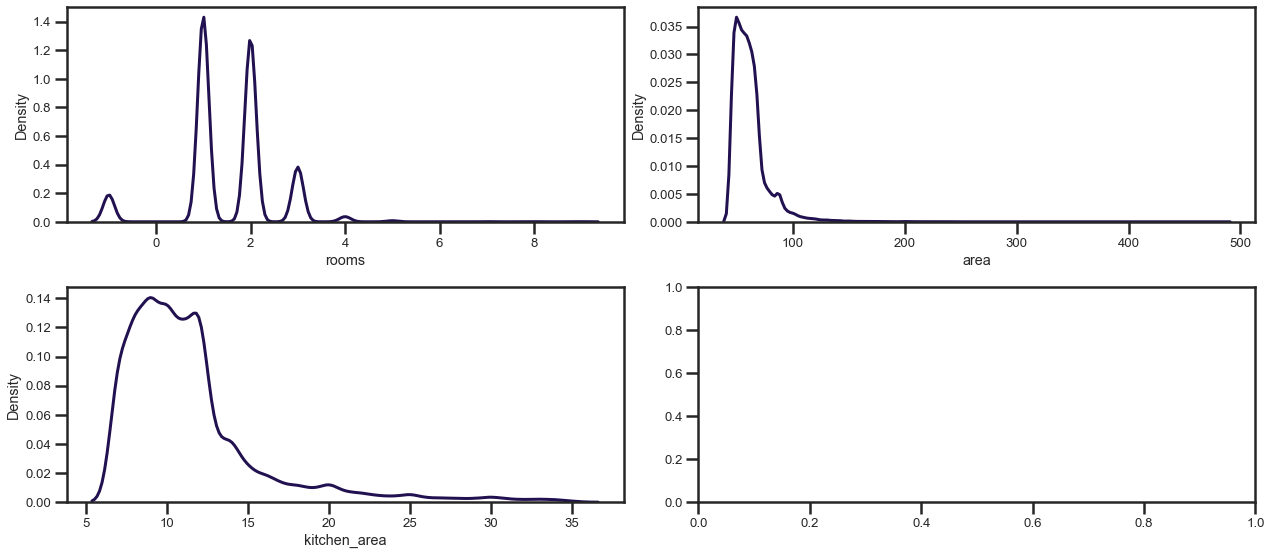

In [53]:
fig,axes = plt.subplots(2,2)
sns.kdeplot(data=x_train_num, x="rooms",ax=axes[0,0])
sns.kdeplot(data=x_train_num, x="area",ax=axes[0,1])
sns.kdeplot(data=x_train_num, x="kitchen_area",ax=axes[1,0])
fig.tight_layout()

### x_test_categorical encoding

In [54]:
# split data into categorical and numerical
x_test_cate = x_test.select_dtypes(exclude='number')
x_test_num = x_test.select_dtypes(include='number')

In [55]:
x_test_cate.head(3)

,building_type,object_type,City
0,Monolithic,New Building,St. Petersburg
1,Panel,Secondary Real Estate,city district of Samara
2,Brick,New Building,city district of Novosibirsk


In [56]:
## build_le stands for building_type label encoder in case we want to inverse transform we can use it
x_test_cate['building_type'], build_test_le = fs.labelE(x_test_cate, 'building_type')

In [57]:
## object_le stands for object_type encoder in case we want to inverse transform we can use it
x_test_cate, object_test_E = fs.OneHotE(x_test_cate, 'object_type')

In [58]:
x_test_cate.head(3)

,building_type,City,object_type_Secondary Real Estate
0,2,St. Petersburg,0.0
1,4,city district of Samara,1.0
2,1,city district of Novosibirsk,0.0


In [59]:
s = x_test_cate.City.unique().tolist()
len(s)

185

In [60]:
x_test_cate, city_test_E = fs.BinaryE(x_test_cate, 'City')

In [61]:
# checking the binray encoder inverse result
len(city_test_E.inverse_transform(x_test_cate.iloc[:,2:]).City.unique()) # same result

185

### x_test_numerical data handling

In [62]:
x_test_num.head(2)

,level,levels,rooms,area,kitchen_area,year,price
0,7.0,28.0,2.0,57.30,12.70,2020.0,9.150810
1,2.0,17.0,1.0,48.39,11.95,2020.0,2.379495


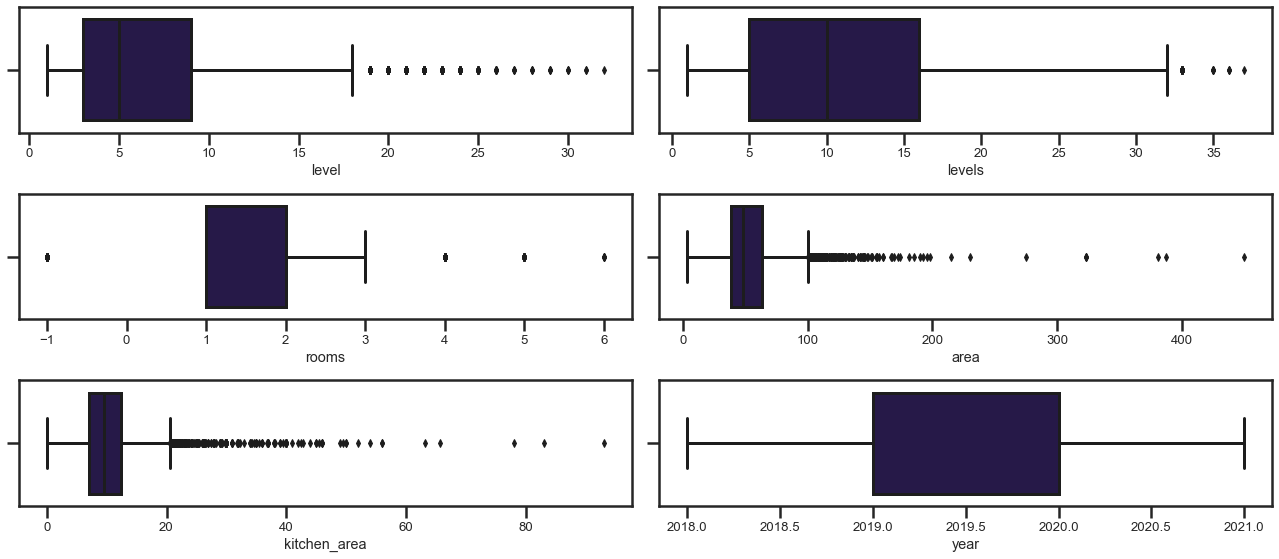

In [63]:
fig,axes = plt.subplots(3,2)
sns.boxplot(data=x_test_num, x="level",ax=axes[0,0])
sns.boxplot(data=x_test_num, x="levels",ax=axes[0,1])
sns.boxplot(data=x_test_num, x="rooms",ax=axes[1,0])
sns.boxplot(data=x_test_num, x="area",ax=axes[1,1])
sns.boxplot(data=x_test_num, x="kitchen_area",ax=axes[2,0])
sns.boxplot(data=x_test_num, x="year",ax=axes[2,1])
fig.tight_layout()

In [64]:
for col in x_test_num.columns:
    print(col, x_test_num[col].max(),',',  x_test_num[col].min())

level 32.0 , 1.0
levels 37.0 , 1.0
rooms 6.0 , -1.0
area 450.0 , 3.4
kitchen_area 93.0 , 0.06
year 2021.0 , 2018.0
price 19.019 , 0.5


In [65]:
## dealing with area less than 69
under_69m = x_test_num[(x_test_num['area'] <= 69) & (x_test_num['rooms'] > 2)].index
for index in under_69m:
    fs.substitute(x_test_num, 'rooms', index, np.random.randint(1,3))
    fs.substitute(x_test_num, 'area', index, np.random.randint(45,70))
    fs.substitute(x_test_num, 'kitchen_area', index, np.random.randint(7,13))

In [66]:
## dealing with area from 70 to 90
above_70m = x_test_num[((x_test_num['area'] >= 70)&(x_test_num['area'] <= 90)) & (x_test_num['rooms'] > 3)].index
for index in above_70m:
    fs.substitute(x_test_num, 'rooms', index, np.random.randint(2,4))
    fs.substitute(x_test_num, 'kitchen_area', index, np.random.randint(8,17))

In [67]:
## dealing with area from 100 to 150
above_100m = x_test_num[((x_test_num['area'] >= 100)&(x_test_num['area'] <= 150)) & (x_test_num['rooms'] > 5)].index
for index in above_100m:
    fs.substitute(x_test_num, 'rooms', index, np.random.randint(3,5))
    fs.substitute(x_test_num, 'kitchen_area', index, np.random.randint(13,22))

In [68]:
## dealing with area from 151 to 300
above_150 = x_test_num[((x_test_num['area'] > 150)&(x_test_num['area'] <= 300)) & (x_test_num['rooms'] > 7)].index
for index in above_150:
    fs.substitute(x_test_num, 'rooms', index, np.random.randint(4,7))
    fs.substitute(x_test_num, 'kitchen_area', index, np.random.randint(15,25))

In [69]:
# apartments greater than 300 square meters
extra = x_test_num[(x_test_num['area'] > 300)].index
for index in extra:
    fs.substitute(x_test_num, 'rooms', index, np.random.randint(7,10))
    fs.substitute(x_test_num, 'area', index, np.random.randint(301,501))
    fs.substitute(x_test_num, 'kitchen_area', index, np.random.randint(25,35))

In [70]:
for col in x_test_num.columns:
    print(col, x_test_num[col].max(),',',  x_test_num[col].min())

level 32.0 , 1.0
levels 37.0 , 1.0
rooms 9.0 , -1.0
area 487.0 , 3.4
kitchen_area 83.0 , 0.06
year 2021.0 , 2018.0
price 19.019 , 0.5


In [71]:
#area less than 45 meter
area_less45 = x_test_num[x_test_num['area'] <45].index
for index in area_less45:
    fs.substitute(x_test_num, 'area', index, np.random.randint(45,70))
    fs.substitute(x_test_num, 'kitchen_area', index, np.random.randint(7,13))

In [72]:
#kitchen area greater than 35 or less than 7 meters
kitchen_greater35 = x_test_num[(x_test_num['kitchen_area'] >35) | (x_test_num['kitchen_area'] < 7)].index
for index in kitchen_greater35:
    fs.substitute(x_test_num, 'kitchen_area', index, np.random.randint(10,35))

In [73]:
for col in x_test_num.columns:
    print(col, x_test_num[col].max(),',',  x_test_num[col].min())

level 32.0 , 1.0
levels 37.0 , 1.0
rooms 9.0 , -1.0
area 487.0 , 45.0
kitchen_area 35.0 , 7.0
year 2021.0 , 2018.0
price 19.019 , 0.5


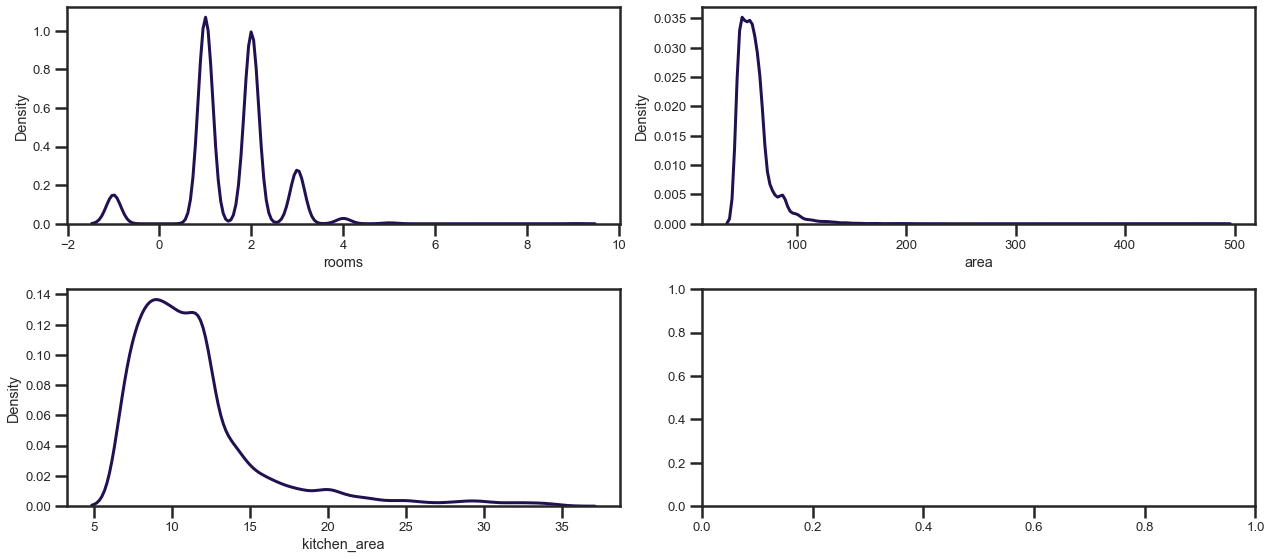

In [74]:
fig,axes = plt.subplots(2,2)
sns.kdeplot(data=x_test_num, x="rooms",ax=axes[0,0])
sns.kdeplot(data=x_test_num, x="area",ax=axes[0,1])
sns.kdeplot(data=x_test_num, x="kitchen_area",ax=axes[1,0])
fig.tight_layout()

### concating x_train& x_test Again

In [75]:
x_train = pd.concat([x_train_cate,x_train_num],axis=1)

In [76]:
x_train.head(3)

,building_type,object_type_Secondary Real Estate,City_1,City_2,City_3,City_4,City_5,City_6,City_7,City_8,level,levels,rooms,area,kitchen_area,year,price
0,2,1.0,0,0,0,0,0,0,0,1,3.0,19.0,1.0,51.0,7.0,2020.0,2.95
1,1,0.0,0,0,0,0,0,0,1,0,8.0,9.0,2.0,61.0,16.6,2019.0,5.50
2,2,1.0,0,0,0,0,0,0,1,1,5.0,12.0,2.0,60.0,15.0,2019.0,5.70


In [77]:
x_test = pd.concat([x_test_cate,x_test_num],axis=1)

In [78]:
x_test.head(3)

,building_type,object_type_Secondary Real Estate,City_1,City_2,City_3,City_4,City_5,City_6,City_7,City_8,level,levels,rooms,area,kitchen_area,year,price
0,2,0.0,0,0,0,0,0,0,0,1,7.0,28.0,2.0,57.30,12.70,2020.0,9.150810
1,4,1.0,0,0,0,0,0,0,1,0,2.0,17.0,1.0,48.39,11.95,2020.0,2.379495
2,1,0.0,0,0,0,0,0,0,1,1,1.0,16.0,3.0,72.20,11.00,2019.0,3.202000


## spliting y_train and y_test

In [79]:
y_test = x_test['price']
x_test.drop(columns=['price'],axis=1,inplace=True)

In [80]:
y_train = x_train['price']
x_train.drop(columns=['price'],axis=1,inplace=True)

In [84]:
x_train.head(3)

,building_type,object_type_Secondary Real Estate,City_1,City_2,City_3,City_4,City_5,City_6,City_7,City_8,level,levels,rooms,area,kitchen_area,year
0,2,1.0,0,0,0,0,0,0,0,1,3.0,19.0,1.0,51.0,7.0,2020.0
1,1,0.0,0,0,0,0,0,0,1,0,8.0,9.0,2.0,61.0,16.6,2019.0
2,2,1.0,0,0,0,0,0,0,1,1,5.0,12.0,2.0,60.0,15.0,2019.0


In [85]:
x_test.head(3)

,building_type,object_type_Secondary Real Estate,City_1,City_2,City_3,City_4,City_5,City_6,City_7,City_8,level,levels,rooms,area,kitchen_area,year
0,2,0.0,0,0,0,0,0,0,0,1,7.0,28.0,2.0,57.30,12.70,2020.0
1,4,1.0,0,0,0,0,0,0,1,0,2.0,17.0,1.0,48.39,11.95,2020.0
2,1,0.0,0,0,0,0,0,0,1,1,1.0,16.0,3.0,72.20,11.00,2019.0


In [87]:
y_train.head(7)

0    2.95
1    5.50
2    5.70
3    2.60
4    2.40
5    6.75
6    1.80
Name: price, dtype: float64

In [88]:
y_test.head(7)

0    9.150810
1    2.379495
2    3.202000
3    1.000000
4    1.135680
5    4.370000
6    3.000000
Name: price, dtype: float64

## feature scaling

In [90]:
for col in x_train.columns:
    print(col, x_train[col].max(),',',  x_train[col].min())

building_type 5 , 0
object_type_Secondary Real Estate 1.0 , 0.0
City_1 1 , 0
City_2 1 , 0
City_3 1 , 0
City_4 1 , 0
City_5 1 , 0
City_6 1 , 0
City_7 1 , 0
City_8 1 , 0
level 35.0 , 1.0
levels 39.0 , 1.0
rooms 9.0 , -1.0
area 484.0 , 45.0
kitchen_area 35.0 , 7.0
year 2021.0 , 2018.0


* Data Ranges doesn't ne